<a href="https://colab.research.google.com/github/shahidadnan/Drug-Discovery/blob/main/Extraction_CHEMBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
!pip install chembl_webresource_client
import math
from pathlib import Path
from zipfile import ZipFile
from tempfile import TemporaryDirectory

import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from chembl_webresource_client.new_client import new_client
from tqdm.auto import tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 3.0 MB/s eta 0:00:00


In [ ]:
targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity

In [ ]:
type(targets_api)

chembl_webresource_client.query_set.QuerySet

In [ ]:
uniprot_id = "P22303","P06276"

In [ ]:
# Get target information from ChEMBL but restrict it to specified values only
targets = targets_api.get(target_components__accession=uniprot_id).only(
    "target_chembl_id", "organism", "pref_name", "target_type"
)
print(f'The type of the targets is "{type(targets)}"')

The type of the targets is "<class 'chembl_webresource_client.query_set.QuerySet'>"


In [ ]:
targets = pd.DataFrame.from_records(targets)
targets

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Acetylcholinesterase,CHEMBL220,SINGLE PROTEIN
1,Homo sapiens,Acetylcholinesterase,CHEMBL220,SINGLE PROTEIN
2,Homo sapiens,Butyrylcholinesterase,CHEMBL1914,SINGLE PROTEIN
3,Homo sapiens,Cholinesterases; ACHE & BCHE,CHEMBL2095233,SELECTIVITY GROUP


In [ ]:
# prompt: code to delete duplicate rows with same target_chembl_id

targets = targets.drop_duplicates(subset=['target_chembl_id'])


In [ ]:
targets.head()

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Acetylcholinesterase,CHEMBL220,SINGLE PROTEIN
2,Homo sapiens,Butyrylcholinesterase,CHEMBL1914,SINGLE PROTEIN
3,Homo sapiens,Cholinesterases; ACHE & BCHE,CHEMBL2095233,SELECTIVITY GROUP


In [ ]:
import pandas as pd

final_data = pd.DataFrame()

no_of_rows = len(targets)

df = pd.DataFrame()
# loop to get data related to each target id and combine it to make a single dataframe
for i in range(no_of_rows):
    try:
        target = targets.iloc[i]  # Accessing each row using index i
        chembl_id = target.target_chembl_id
        print(f"The target ChEMBL ID is {chembl_id}")
        bioactivities = bioactivities_api.filter(
            target_chembl_id=chembl_id, type="IC50", relation="=", assay_type="B"
        ).only(
            "activity_id",
            "assay_chembl_id",
            "assay_description",
            "assay_type",
            "molecule_chembl_id",
            "type",
            "standard_units",
            "relation",
            "standard_value",
            "target_chembl_id",
            "target_organism",
        )
        print(f"Length and type of first element: {len(bioactivities)}, {type(bioactivities)}")
        bioactivities_df = pd.DataFrame.from_dict(bioactivities)
        print(f"DataFrame shape: {bioactivities_df.shape}")
        print(bioactivities_df.head())

        print(bioactivities_df.head())
        df = pd.concat([df, bioactivities_df], ignore_index=True)
    except Exception as e:
        print(f"Error fetching data for ChEMBL ID {chembl_id}: {str(e)}")

print(f"Final DataFrame shape: {df.shape}")

The target ChEMBL ID is CHEMBL220
Length and type of first element: 6377, <class 'chembl_webresource_client.query_set.QuerySet'>
DataFrame shape: (6377, 13)
   activity_id assay_chembl_id  \
0        33969    CHEMBL643384   
1        37563    CHEMBL643384   
2        38902    CHEMBL643384   
3        41170    CHEMBL643384   
4        42363    CHEMBL643384   

                                   assay_description assay_type  \
0  Inhibitory concentration against acetylcholine...          B   
1  Inhibitory concentration against acetylcholine...          B   
2  Inhibitory concentration against acetylcholine...          B   
3  Inhibitory concentration against acetylcholine...          B   
4  Inhibitory concentration against acetylcholine...          B   

  molecule_chembl_id relation standard_units standard_value target_chembl_id  \
0       CHEMBL133897        =             nM          750.0        CHEMBL220   
1       CHEMBL336398        =             nM          100.0        CHEMBL22

In [ ]:
df

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,33969,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL133897,=,nM,750.0,CHEMBL220,Homo sapiens,IC50,uM,0.75
1,37563,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL336398,=,nM,100.0,CHEMBL220,Homo sapiens,IC50,uM,0.1
2,38902,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL130628,=,nM,300.0,CHEMBL220,Homo sapiens,IC50,uM,0.3
3,41170,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL130478,=,nM,800.0,CHEMBL220,Homo sapiens,IC50,uM,0.8
4,42363,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL130112,=,nM,2400.0,CHEMBL220,Homo sapiens,IC50,uM,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10115,25083716,CHEMBL5256377,Inhibition of human BChE using butyrylthiochol...,B,CHEMBL5283557,=,nM,9700.0,CHEMBL1914,Homo sapiens,IC50,uM,9.7
10116,25083717,CHEMBL5256377,Inhibition of human BChE using butyrylthiochol...,B,CHEMBL502,=,nM,4800.0,CHEMBL1914,Homo sapiens,IC50,uM,4.8
10117,25083718,CHEMBL5256377,Inhibition of human BChE using butyrylthiochol...,B,CHEMBL5288465,=,nM,3300.0,CHEMBL1914,Homo sapiens,IC50,uM,3.3
10118,25083741,CHEMBL5256380,Inhibition of BChE (unknown origin),B,CHEMBL659,=,nM,19100.0,CHEMBL1914,Homo sapiens,IC50,uM,19.1


In [ ]:
df["units"].unique()

array(['uM', 'mM', 'nM', 'M', 'ug ml-1', 'pM', "10'-5M", "10'-3M",
       "10'-2M", "10'-4M", "10'-7M", "10'-9M", "10'-6M", "10'-8M",
       "10'-3microM", "10'-4microM", 'uM/L', "10'-10M", 'umol', 'umol/L',
       "10'3pM", "10'6pM", "10'5pM", "10'2pM", "10'-12M", "10'-2microM",
       '10^-3microM', '10^-4microM', 'mg/ml', "10'-5 uM", "10'-3mg/ml",
       'mmol/L'], dtype=object)

In [ ]:
bioactivities_df = df
bioactivities_df.drop(["units", "value"], axis=1, inplace=True)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,33969,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL133897,=,nM,750.0,CHEMBL220,Homo sapiens,IC50
1,37563,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL336398,=,nM,100.0,CHEMBL220,Homo sapiens,IC50
2,38902,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL130628,=,nM,300.0,CHEMBL220,Homo sapiens,IC50
3,41170,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL130478,=,nM,800.0,CHEMBL220,Homo sapiens,IC50
4,42363,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL130112,=,nM,2400.0,CHEMBL220,Homo sapiens,IC50


In [ ]:
bioactivities_df.dtypes

,0
activity_id,int64
assay_chembl_id,object
assay_description,object
assay_type,object
molecule_chembl_id,object
relation,object
standard_units,object
standard_value,object
target_chembl_id,object
target_organism,object


In [ ]:
bioactivities_df = bioactivities_df.astype({"standard_value": "float64"})
bioactivities_df.dtypes

,0
activity_id,int64
assay_chembl_id,object
assay_description,object
assay_type,object
molecule_chembl_id,object
relation,object
standard_units,object
standard_value,float64
target_chembl_id,object
target_organism,object


In [ ]:
bioactivities_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (10120, 11)


In [ ]:
bioactivities_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (10120, 11)


In [ ]:
print(f"Units in downloaded data: {bioactivities_df['standard_units'].unique()}")
print(
    f"Number of non-nM entries:\
    {bioactivities_df[bioactivities_df['standard_units'] != 'nM'].shape[0]}"
)

Units in downloaded data: ['nM' 'ug.mL-1' "10'3pM" "10'6pM" "10'5pM" '10^-4microM']
Number of non-nM entries:    39


In [ ]:
bioactivities_df = bioactivities_df[bioactivities_df["standard_units"] == "nM"]
print(f"Units after filtering: {bioactivities_df['standard_units'].unique()}")

Units after filtering: ['nM']


In [ ]:
print(f"DataFrame shape: {bioactivities_df.shape}")


DataFrame shape: (10081, 11)


In [ ]:
bioactivities_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (6220, 11)


In [ ]:
bioactivities_df.reset_index(drop=True, inplace=True)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,33969,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL133897,=,nM,750.0,CHEMBL220,Homo sapiens,IC50
1,37563,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL336398,=,nM,100.0,CHEMBL220,Homo sapiens,IC50
2,38902,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL130628,=,nM,300.0,CHEMBL220,Homo sapiens,IC50
3,41170,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL130478,=,nM,800.0,CHEMBL220,Homo sapiens,IC50
4,42363,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL130112,=,nM,2400.0,CHEMBL220,Homo sapiens,IC50


In [ ]:
bioactivities_df.rename(
    columns={"standard_value": "IC50", "standard_units": "units"}, inplace=True
)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,units,IC50,target_chembl_id,target_organism,type
0,33969,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL133897,=,nM,750.0,CHEMBL220,Homo sapiens,IC50
1,37563,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL336398,=,nM,100.0,CHEMBL220,Homo sapiens,IC50
2,38902,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL130628,=,nM,300.0,CHEMBL220,Homo sapiens,IC50
3,41170,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL130478,=,nM,800.0,CHEMBL220,Homo sapiens,IC50
4,42363,CHEMBL643384,Inhibitory concentration against acetylcholine...,B,CHEMBL130112,=,nM,2400.0,CHEMBL220,Homo sapiens,IC50


In [ ]:
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (6220, 11)


In [ ]:
compounds_provider = compounds_api.filter(
    molecule_chembl_id__in=list(bioactivities_df["molecule_chembl_id"])
).only("molecule_chembl_id", "molecule_structures")

In [ ]:
compounds = list(tqdm(compounds_provider))

  0%|          | 0/6220 [00:00<?, ?it/s]

In [ ]:
compounds_df = pd.DataFrame.from_records(
    compounds,
)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (6220, 2)


In [ ]:
compounds_df.head()

,molecule_chembl_id,molecule_structures
0,CHEMBL269538,{'canonical_smiles': 'COc1ccc2c(c1)[nH]c1c(C)n...
1,CHEMBL411,{'canonical_smiles': 'CC/C(=C(/CC)c1ccc(O)cc1)...
2,CHEMBL416,{'canonical_smiles': 'COc1c2occc2cc2ccc(=O)oc1...
3,CHEMBL21,"{'canonical_smiles': 'Nc1ccc(S(N)(=O)=O)cc1', ..."
4,CHEMBL424,"{'canonical_smiles': 'O=C(O)c1ccccc1O', 'molfi..."


In [ ]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (6218, 2)


In [ ]:
compounds_df.iloc[0].molecule_structures.keys()

dict_keys(['canonical_smiles', 'molfile', 'standard_inchi', 'standard_inchi_key'])

In [ ]:
canonical_smiles = []

for i, compounds in compounds_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

compounds_df["smiles"] = canonical_smiles
compounds_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (6218, 2)


In [ ]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (6218, 2)


In [ ]:
print(f"Bioactivities filtered: {bioactivities_df.shape[0]}")
bioactivities_df.columns

Bioactivities filtered: 6220


Index(['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type',
       'molecule_chembl_id', 'relation', 'units', 'IC50', 'target_chembl_id',
       'target_organism', 'type'],
      dtype='object')

In [ ]:
print(f"Compounds filtered: {compounds_df.shape[0]}")
compounds_df.columns

Compounds filtered: 6218


Index(['molecule_chembl_id', 'smiles'], dtype='object')

In [ ]:
# Merge DataFrames
output_df = pd.merge(
    bioactivities_df[["molecule_chembl_id", "IC50", "units"]],
    compounds_df,
    on="molecule_chembl_id",
)

# Reset row indices
output_df.reset_index(drop=True, inplace=True)

print(f"Dataset with {output_df.shape[0]} entries.")

Dataset with 6218 entries.


In [ ]:
output_df.dtypes

,0
molecule_chembl_id,object
IC50,float64
units,object
smiles,object


In [ ]:
output_df.head(10)

,molecule_chembl_id,IC50,units,smiles
0,CHEMBL133897,750.0,nM,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,nM,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL130628,300.0,nM,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
3,CHEMBL130478,800.0,nM,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
4,CHEMBL130112,2400.0,nM,CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1
5,CHEMBL130098,100.0,nM,CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C
6,CHEMBL336538,800.0,nM,COc1ccc(-c2nc(SC)n(C(=O)N(C)C)n2)cc1
7,CHEMBL335033,50.0,nM,CSc1nc(-c2ccc3ccccc3c2)nn1C(=O)N(C)C
8,CHEMBL338720,560.0,nM,CSc1nc(-c2ccc(-c3ccccc3)cc2)nn1C(=O)N(C)C
9,CHEMBL131536,1400.0,nM,CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)c1ccccc1


In [ ]:
def convert_ic50_to_pic50(IC50_value):
    if IC50_value <= 0:
        pIC50_value = np.nan
    else:
        pIC50_value = 9 - math.log10(IC50_value)
    return pIC50_value

# Apply conversion to each row of the compounds DataFrame
output_df["pIC50"] = output_df.apply(lambda x: convert_ic50_to_pic50(x.IC50), axis=1)

In [ ]:
# Apply conversion to each row of the compounds DataFrame
output_df["pIC50"] = output_df.apply(lambda x: convert_ic50_to_pic50(x.IC50), axis=1)

In [ ]:
output_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL133897,750.0,nM,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,6.124939
1,CHEMBL336398,100.0,nM,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,7.000000
2,CHEMBL130628,300.0,nM,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,6.522879
3,CHEMBL130478,800.0,nM,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,6.096910
4,CHEMBL130112,2400.0,nM,CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1,5.619789


array([[<Axes: title={'center': 'pIC50'}>]], dtype=object)

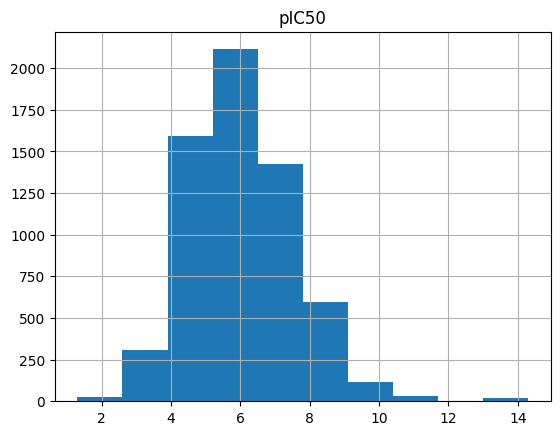

In [ ]:
output_df.hist(column="pIC50")

In [ ]:
# Add molecule column
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol="smiles")

In [ ]:
# Sort molecules by pIC50
output_df.sort_values(by="pIC50", ascending=False, inplace=True)

# Reset index
output_df.reset_index(drop=True, inplace=True)

In [ ]:
import os

In [ ]:
output_df.to_excel(os.path.join(os.getcwd(),"AcHE.xlsx"), index=False)